# **Logistic Regression**

Logistic Regression is a classification learning algorithm that estimates the probability of an instance belonging to a specific class.  

Given an input feature vector X (let's say corresponds to an image), then algorithm produces Yhat('Y-Hat'), an estimated probability of Y.  
An exmaple can be to predict whether the given image is a dog image or not.  

In this practical , we will understand how Logistic Regression works and how to implement it from scratch.

**Importing Necessary Libraries**

In [13]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
%matplotlib inline

**Generating Dataset**

In [2]:
def generate_data():
    X, y = make_classification(n_samples=5000,
                               n_features=2,
                               n_redundant=0,
                               n_informative=2,
                               random_state=14,
                               n_clusters_per_class=1)
    return X, y

X, y = generate_data()

In [3]:
print(X)
print(y)

[[ 0.42165233 -0.06506637]
 [ 2.24762954 -2.67965165]
 [-0.7732556   1.14606175]
 ...
 [-0.15868599  1.59278   ]
 [ 0.70120236 -0.76082916]
 [-1.79473586  0.18071854]]
[1 1 0 ... 0 1 0]


**Estimating Probabilities**  

In order to estimate the probabilities of a particular instance using Logistic Regression algorithm, we will use Sigmoid Function.  
A sigmoid function is a mathematical function with a characteristic "S"-shaped curve or sigmoid curve. It transforms any value in the domain to a number between 0 and 1.

![Sigmoid function](https://media.licdn.com/dms/image/v2/D4D12AQGIXdSG7IJCNw/article-cover_image-shrink_423_752/article-cover_image-shrink_423_752/0/1694183259538?e=1743033600&v=beta&t=pJMRYKf4Rdids196HqbR9vRIaV3bzPogptV8Je7ln7I)

Then our Logistic Regression model estimated probability will be : Yhat = h(X) = a(Xθ)

In [4]:
def add_intercept(X):
    """Add an intercept (bias) term to the input features X."""
    intercept = np.ones((X.shape[0],1))
    return np.concatenate((intercept, X), axis =1)

def sigmoid(z):
    """Calculate the sigmoid function of the input z."""
    return 1/(1 + np.exp(-z))

def calc_h(X, theta):
    """Calculate the hypothesis (predicted probabilities) using the sigmoid function."""
    z = np.dot(X, theta)
    h = sigmoid(z)
    return h

In [5]:
def gradient_descent(X, y, theta, alpha, num_iter):
    """Perform gradient descent to optimize the logistic regression parameters."""
    m = y.size
    cost_list = []

    for i in range(num_iter):
        h = calc_h(X, theta)
        cost = (-y * np.log(h) - (1 - y)*np.log(1 - h)).mean()
        cost_list.append(cost)

        gradient = np.dot(X.T, (h-y))/m
        theta -= alpha*gradient

        if i % 10000 == 0:
            print('Cost: {}'.format(cost))

    return cost_list, theta

In [8]:
def logistic_regression(X, y, alpha=0.01, num_iter=100000):
    """Perform logistic regression on the given data and return the optimal parameters."""
    XX = add_intercept(X)
    theta = np.zeros(XX.shape[1])

    cost_list, optimal_parameters = gradient_descent(XX, y, theta, alpha, num_iter)

    return (cost_list, optimal_parameters)

In [9]:
X, y = generate_data()
cost_list, optimal_parameters = logistic_regression(X, y)

Cost: 0.6931471805599454
Cost: 0.1925637794032024
Cost: 0.1924598915649235
Cost: 0.1924588410866353
Cost: 0.1924588292305504
Cost: 0.19245882909517864
Cost: 0.19245882909363093
Cost: 0.19245882909361264
Cost: 0.1924588290936128
Cost: 0.19245882909361306


In [10]:
print(optimal_parameters)

[ 0.48974995  2.04436201 -1.98411782]


**Plotting the Cost function**

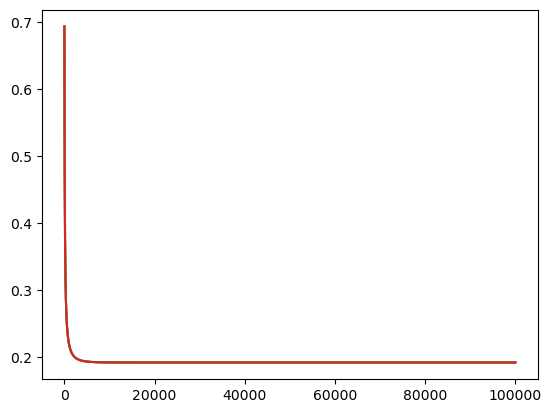

In [15]:
plt.plot(range(100000), cost_list)
plt.show()

**Decision Boundary**

In [18]:
def plot_decision_boundary(X, y, theta):
    """Plot the decision boundary and the data points."""
    plt.figure(figsize=(10,6))

    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    grid = np.c_[xx1.ravel(), xx2.ravel()]

    grid = add_intercept(grid)
    probs = calc_h(grid, theta)
    probs = probs.reshape(xx1.shape)

    ax = plt.gca()
    plt.contourf(xx1, xx2, probs, levels=25, cmap=plt.cm.twilight, alpha=0.8)
    plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors = 'black')
    plt.scatter(X[:,0], X[:,1], c=y.ravel(), s=40, cmap=plt.cm.twilight, edgecolors='black')
    plt.plot(-0.37, 0.19, 'bx', markersize=20, markeredgewidth=2)

    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    ax.set_xlim([x1_min, x1_max])
    ax.set_ylim([x2_min, x2_max])

    # Customize the plot style
    plt.title("Decision Boundary Plot", fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.colorbar(label="Probability")

    plt.show()

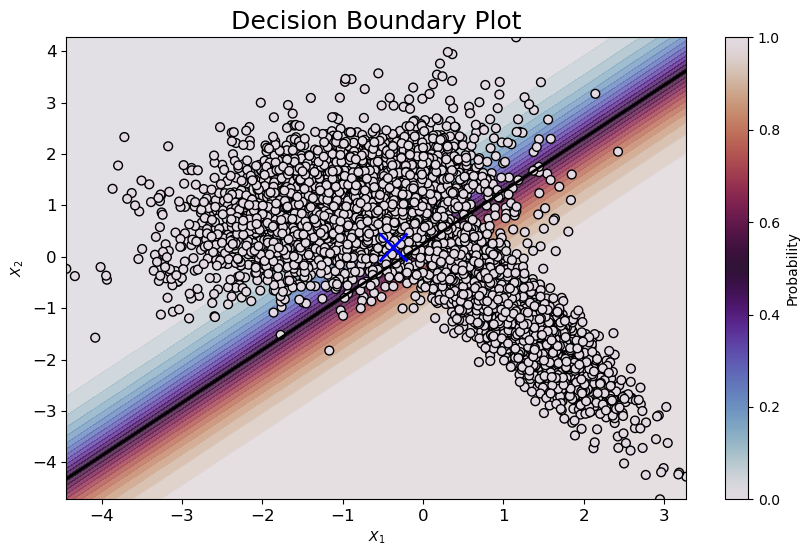

In [20]:
plot_decision_boundary(X, y, optimal_parameters)

**Sklearn Implementation**

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1e20, solver='lbfgs')
model.fit(X, y)
preds = model.predict(X)

score_sklearn = (preds == y).mean()
print('Score Sklearn: {}'.format(score_sklearn))
print(model.intercept_, model.coef_)

Score Sklearn: 0.9274
[0.48978954] [[ 2.04438324 -1.9841818 ]]


In [23]:
# The prediction we got 
# [ 0.48974995  2.04436201 -1.98411782]

**Assumption Testing**

Assumption testing is an essential step in logistic regression to ensure the validity and reliability of the model's results.  
These assumptions include the appropriate outcome type (categorical), linearity of independent variables and log odds, absence of strongly influential outliers, absence of ulticollinearity, independence of observabations, and a sufficiently large sample size.

Assumption 1 - Appropriate outcome type (Must be categorical)  

Assumption 2 - Linearity of independent variables and log odds  

Assumption 3 - No Strongly influential outliers  

Assumption 4 - Absence of multicollinearity  

Assumption 5 - Independence of observbations  

Assumption 6 - Sufficiently large sample size  


In [24]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from statsmodels.tools import add_constant
%matplotlib inline

def assumption_testing(X, y, theta):
    """Perform assumption testing for logistic regression."""
    XX = add_intercept(X)
    model = sm.Logit(y, XX).fit()

    # Assumption 2: Linearity of independent variables and log odds
    print("Assumption 2: Linearity of independent variables and log odds:")
    print(model.summary())
    print('\n')

    # Assumption 3: No strongly influential otuliers
    print("Assumption 3: No strongly influential otuliers:")
    pred_prob = model.predict(XX)
    leverage = np.sum(XX * (1- XX), axis=1) * pred_prob * (1-pred_prob)
    cooks_d = (pred_prob - y) ** 2/ leverage
    print("Cook's Distance for each observation:")
    print(cooks_d)
    print('\n')

    # Assumption 4: Absence of multicollinearity
    print("Assumption 4 - Absence of multicollinearity:")
    vif = [variance_inflation_factor(XX, i) for i in range(XX.shape[1])]
    print("Variance Inflation Factors:")
    print(vif)
    print('\n')

    # Assumption 6: Sufficiently large sample size
    print("Assumption 6 - Sufficiently large sample size:")
    print("Sample Size:", len(y))

In [25]:
assumption_testing(X, y, optimal_parameters)

Optimization terminated successfully.
         Current function value: 0.192459
         Iterations 8
Assumption 2: Linearity of independent variables and log odds:
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4997
Method:                           MLE   Df Model:                            2
Date:                Sun, 19 Jan 2025   Pseudo R-squ.:                  0.7223
Time:                        13:01:40   Log-Likelihood:                -962.29
converged:                       True   LL-Null:                       -3465.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4897      0.067      7.349  